# Assessment description
In this assessment, you will focus on both **prediction** and **explanation**.

## A. Prediction task

For the prediction task, the underlying problem is to predict customer interest in vehicle insurance using the collected attributes. The provided dataset is well organised and fairly clean. It is important that you understand the importance of each attribute in the problem. 

To measure the performance of your model(s), you should fit the model to the training dataset, perform the prediction on the test dataset and finally compute some performance metrics of your choice. You must use **at least two performance metrics** to score the models. **We expect you to justify these metrics according to the data characteristics.** To successfully finish this task, you must:

1. Perform **a comprehensive Exploratory Data Analysis (EDA)** on the data to identify the features’ characteristics and relevance. **Uni-,bi-, and multivariate** feature analyses are expected

  1.1 Both **statistical** and **graphical** analysis are expected to be included in your EDA.
  
  1.2 You must avoid just printing the stats or plotting the visualisations without any explanation! **A comprehensive written analysis** should be followed to demonstrate the key findings and observations of each step of the exploration.
  
  
2. **Describe and justify the choice of your models according to your EDA**.
3. Develop three types of models (**three different modelling families** (e.g., KNN, QDA, and Logistic Regression)) on the train set using **train_test_split** or **K-fold cross-validation** strategy. Models with different feature sets or hyper-parameters are not considered as different families (e.g., 'three KNN models with k=2, 3 and 4' or 'three Logistic Regression models with different features' are not accepted).
4. **Evaluate your models** using your selected performance measures on the provided test set. Then, **analyse and compare your models’ performance** according to their scores on the test set and other models' characteristics (such as train time, model variability, response time, etc.) and select one of the three developed models as your final model.

## B.Explanation task

The purpose of the explanation task is to give a clear insight into why customers are/are not interested in the vehicle policy product given your selected predictive model. Descriptions can be based on variable correlation analysis, regression equations, linguistic descriptions, or any other form. The descriptions and accompanying interpretation must be comprehensible, useful and actionable for a marketing professional with no prior knowledge of computational learning technology. To finish this task, you need to:

1. **Perform model inference** on the selected model from the previous step, and **identify and discuss** the key factors (e.g., variable importance) of the selected model.
2. **Make your suggestions in terms of marketing**.

# 1. Prediction Task Sample Solution

## 1.1 Install and Import required libraries

In [5]:
# install.packages("dplyr")
install.packages("ggplot2")
install.packages("naniar")
install.packages("reshape")
install.packages("gridExtra")
install.packages("lattice")

also installing the dependencies ‘colorspace’, ‘nlme’, ‘Matrix’, ‘farver’, ‘labeling’, ‘munsell’, ‘RColorBrewer’, ‘viridisLite’, ‘gtable’, ‘isoband’, ‘MASS’, ‘mgcv’, ‘scales’


Warning message in install.packages("ggplot2"):
“installation of package ‘nlme’ had non-zero exit status”
Warning message in install.packages("ggplot2"):
“installation of package ‘Matrix’ had non-zero exit status”
Warning message in install.packages("ggplot2"):
“installation of package ‘mgcv’ had non-zero exit status”
Warning message in install.packages("ggplot2"):
“installation of package ‘ggplot2’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

also installing the dependencies ‘bit’, ‘prettyunits’, ‘bit64’, ‘progress’, ‘nlme’, ‘Matrix’, ‘clipr’, ‘hms’, ‘vroom’, ‘tzdb’, ‘Rcpp’, ‘mgcv’, ‘cpp11’, ‘readr’, ‘gridExtra’, ‘plyr’, ‘ggplot2’, ‘purrr’, ‘tidyr’, ‘norm’, ‘visdat’, ‘forcats’, ‘viridis’, ‘UpSetR’


Warning message in install.packages("naniar"):
“ins

In [4]:
library(dplyr)
library(ggplot2)
library(naniar)
library(reshape)
library(gridExtra) 
library(lattice)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## 1.2 Exploratory Data Analysis(EDA) 

In this section, a comprehensive exploratory data analysis is conducted on the garments empolyee productivity data. The analysis is classified into the following sections:

* **Descriptive Statistics:** presents some general statistics and corrects anomalies identified.
* **Distributions:** analyses data distributions using boxplots and histograms.
* **Counts:** investigates counts per category using bar charts.
* **Time Series Analysis:** examines data trends as a function of date.
* **Correlations:** explores correlations between attributes using correlation function and pair plots.

The tables and plots are presented in each section, followed by insights and analysis.

### 1.2.1 Read Data
Users often find saving their spreadsheets in **comma-separated values** files (CSV) easier. Then they can use R language's built-in functionality to read and manipulate the data. In this assessment, we will use the built-in `read.csv(...)` function call(`...`represents the file store path), which reads the data in as a data frame and assigns the data frame to a variable (using `<-`).

In [3]:
train_data <- read.csv("train.csv") # read train data
test_data <- read.csv("test.csv") # read test data

**Have a first look at the dataset.**

Use of `head()` and `str()`.  `head()` show fist 6 rows of the data, and `str()` will be reviewed a little more in the lesson Data Types and Structures.

In [4]:
# look at fist 6 rows of train data
head(train_data)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
,<int>,<chr>,<int>,<int>,<dbl>,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>
1,371101,Female,23,1,28,1,< 1 Year,No,47628,153,24,0
2,293944,Female,66,1,28,0,1-2 Year,Yes,68981,122,69,1
3,215236,Male,24,1,36,1,< 1 Year,No,37622,160,72,0
4,282668,Female,46,1,31,0,1-2 Year,Yes,2630,124,27,0
5,389325,Female,39,1,28,0,1-2 Year,Yes,74627,26,194,1
6,147057,Male,46,1,29,1,1-2 Year,No,2630,124,285,0


In [5]:
# look at Data Types and Structures
str(train_data)

'data.frame':	305723 obs. of  12 variables:
 $ id                  : int  371101 293944 215236 282668 389325 147057 105585 184855 81246 167214 ...
 $ Gender              : chr  "Female" "Female" "Male" "Female" ...
 $ Age                 : int  23 66 24 46 39 46 22 23 32 20 ...
 $ Driving_License     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Region_Code         : num  28 28 36 31 28 29 50 16 36 37 ...
 $ Previously_Insured  : int  1 0 1 0 0 1 1 1 1 0 ...
 $ Vehicle_Age         : chr  "< 1 Year" "1-2 Year" "< 1 Year" "1-2 Year" ...
 $ Vehicle_Damage      : chr  "No" "Yes" "No" "Yes" ...
 $ Annual_Premium      : num  47628 68981 37622 2630 74627 ...
 $ Policy_Sales_Channel: num  153 122 160 124 26 124 152 152 152 160 ...
 $ Vintage             : int  24 69 72 27 194 285 91 192 38 137 ...
 $ Response            : int  0 1 0 0 1 0 0 0 0 0 ...


### 1.2.2 Anomaly Detection

Commonly, unusually data samples exist in a real-world dataset. To accurately analyse the dataset, anomaly detection will be applied before EDA. Anomaly detection involves identifying a dataset's differences, deviations, and exceptions from the norm. 

1. **number** of `null` values in each columns of the dataframe. This can be done using `summarise_all(...)` in `dplyr` library. or

2. Use `is.na(...)` to detect missing values in the dataset

In [6]:
train_data %>% summarise_all(funs(sum(is.na(.))))

Warning message:
“`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))”


id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,0,0,0,0,0,0


The `which()` function returns the positions with missing values in the dataset.

In [7]:
which(is.na(train_data))

integer(0)

An empty return value of the `which()` function means no missing values in the training dataset.

Using `naniar` library, create a table that shows the number and percentage of missing values per column.

In [8]:
miss_var_summary(train_data)

variable,n_miss,pct_miss
<chr>,<int>,<dbl>
id,0,0
Gender,0,0
Age,0,0
Driving_License,0,0
Region_Code,0,0
Previously_Insured,0,0
Vehicle_Age,0,0
Vehicle_Damage,0,0
Annual_Premium,0,0


Next, use `str` and `summary()` function to general statistics for each attribute of data. For categorical values, these include their counts. The statistics included are **minimum**, **maximum**, **median**, **mean**, and **first** and **third quartiles** for numerical columns.

### 1.2.3 Statistical analysis of training data

In [9]:
str(train_data)

'data.frame':	305723 obs. of  12 variables:
 $ id                  : int  371101 293944 215236 282668 389325 147057 105585 184855 81246 167214 ...
 $ Gender              : chr  "Female" "Female" "Male" "Female" ...
 $ Age                 : int  23 66 24 46 39 46 22 23 32 20 ...
 $ Driving_License     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Region_Code         : num  28 28 36 31 28 29 50 16 36 37 ...
 $ Previously_Insured  : int  1 0 1 0 0 1 1 1 1 0 ...
 $ Vehicle_Age         : chr  "< 1 Year" "1-2 Year" "< 1 Year" "1-2 Year" ...
 $ Vehicle_Damage      : chr  "No" "Yes" "No" "Yes" ...
 $ Annual_Premium      : num  47628 68981 37622 2630 74627 ...
 $ Policy_Sales_Channel: num  153 122 160 124 26 124 152 152 152 160 ...
 $ Vintage             : int  24 69 72 27 194 285 91 192 38 137 ...
 $ Response            : int  0 1 0 0 1 0 0 0 0 0 ...


In [10]:
summary(train_data)

       id            Gender               Age        Driving_License 
 Min.   :     1   Length:305723      Min.   :20.00   Min.   :0.0000  
 1st Qu.:114834   Class :character   1st Qu.:25.00   1st Qu.:1.0000  
 Median :230407   Mode  :character   Median :36.00   Median :1.0000  
 Mean   :234391                      Mean   :38.55   Mean   :0.9981  
 3rd Qu.:345512                      3rd Qu.:49.00   3rd Qu.:1.0000  
 Max.   :508145                      Max.   :85.00   Max.   :1.0000  
  Region_Code    Previously_Insured Vehicle_Age        Vehicle_Damage    
 Min.   : 0.00   Min.   :0.0000     Length:305723      Length:305723     
 1st Qu.:15.00   1st Qu.:0.0000     Class :character   Class :character  
 Median :28.00   Median :0.0000     Mode  :character   Mode  :character  
 Mean   :26.41   Mean   :0.4888                                          
 3rd Qu.:35.00   3rd Qu.:1.0000                                          
 Max.   :52.00   Max.   :1.0000                                   

Check the unique value of those columns with data type `chr`

In [11]:
apply(train_data[c("Gender","Vehicle_Age","Vehicle_Damage", "Response")], 2, function(x) unique(x))

$Gender
[1] "Female" "Male"  

$Vehicle_Age
[1] "< 1 Year"  "1-2 Year"  "> 2 Years"

$Vehicle_Damage
[1] "No"  "Yes"

$Response
[1] "0" "1"

**Summery of Observations:**

* Training data contains 305723 observations, and each has 12 variables.
* The variables include 11 predictors and one response variable. The response variable is named `Response` with an `int` data type.
* Without any `null` or missing values in training data.
* Meaningful column names represent their content, so no column renaming is needed.
* Columns `Gender`, `Vehicle_Age` and `Vehicle_Damage` with data type `chr`.
* `Gender` column contains 2 distinct values: `Female` and `Male`. `Vehicle_Age` column contains 3 distinct values: `< 1 Year`,`1-2 Year` and `> 2 Years`. `Vehicle_Damage` column contains 2 distinct values: `No` and `Yes`.
* The response variable `Response` column contains 2 distinct values: `0` and `1`.
* The maximum values in `wip`, `over_time`, `incentive`, and `idle_time` columns are very high compared to the corresponding 3rd quartiles. They can be regarded as outliers!
* The maximum value for `Annual_Premium` is **540165** , which is around 205 times larger than the minimum value(**2630**). Moreover, it is also very high compared to the corresponding 3rd quartiles (**39451**). Those observations can be regarded as outliers.
* Consider change data type of columns `Gender`,`Vehicle_Age` and `Vehicle_Damage` from `character` to `numeric` to fit model efficiently.

### 1.2.4 Graphical analysis of training data

In [12]:
setup_fig_size <- function(width, heigth){
    options(repr.plot.width = width, repr.plot.height = heigth)
}

In [13]:
#Get name of all numerical columns
num_cols <- names(train_data)[sapply(train_data, is.numeric)]
print(num_cols)

[1] "id"                   "Age"                  "Driving_License"     
[4] "Region_Code"          "Previously_Insured"   "Annual_Premium"      
[7] "Policy_Sales_Channel" "Vintage"              "Response"            


In [14]:
#Get name of all non-numerical columns
non_num_cols <- names(train_data)[!(names(train_data) %in% num_cols)]
print(non_num_cols)

[1] "Gender"         "Vehicle_Age"    "Vehicle_Damage"


In [15]:
train_data_melt = melt(train_data,id = non_num_cols, variable_name = "Feature")
head(train_data_melt)

,Gender,Vehicle_Age,Vehicle_Damage,Feature,value
,<chr>,<chr>,<chr>,<fct>,<dbl>
1,Female,< 1 Year,No,id,371101
2,Female,1-2 Year,Yes,id,293944
3,Male,< 1 Year,No,id,215236
4,Female,1-2 Year,Yes,id,282668
5,Female,1-2 Year,Yes,id,389325
6,Male,1-2 Year,No,id,147057


### Boxplot

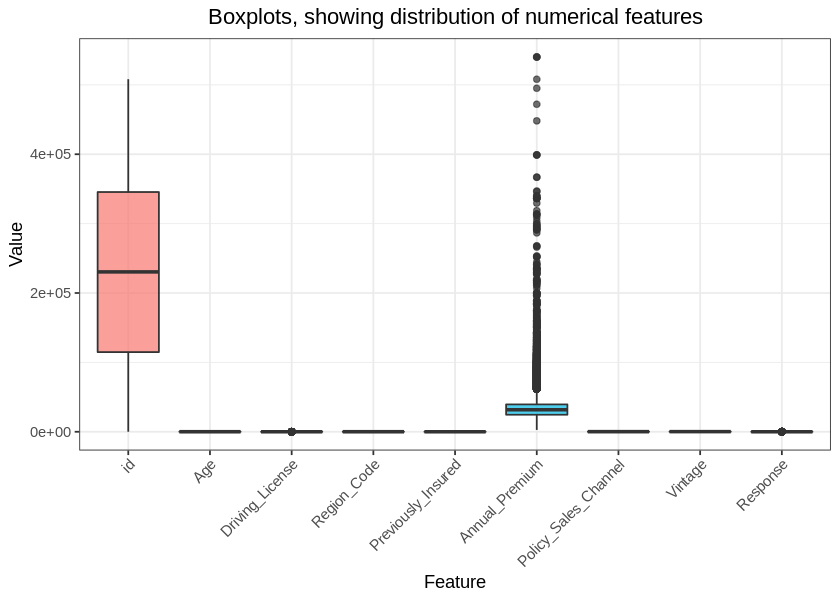

In [16]:
setup_fig_size(15,10)

ggplot(train_data_melt, aes(x=Feature, y=value, fill=Feature)) + 
  geom_boxplot(alpha=0.7) + ylab("Value") + xlab("Feature" ) +
  theme_bw() + 
  ggtitle("Boxplots, showing distribution of numerical features") + 
  theme(legend.position="none", 
        axis.text.x = element_text(angle = 45, hjust = 1),
        plot.title = element_text(hjust = 0.5))

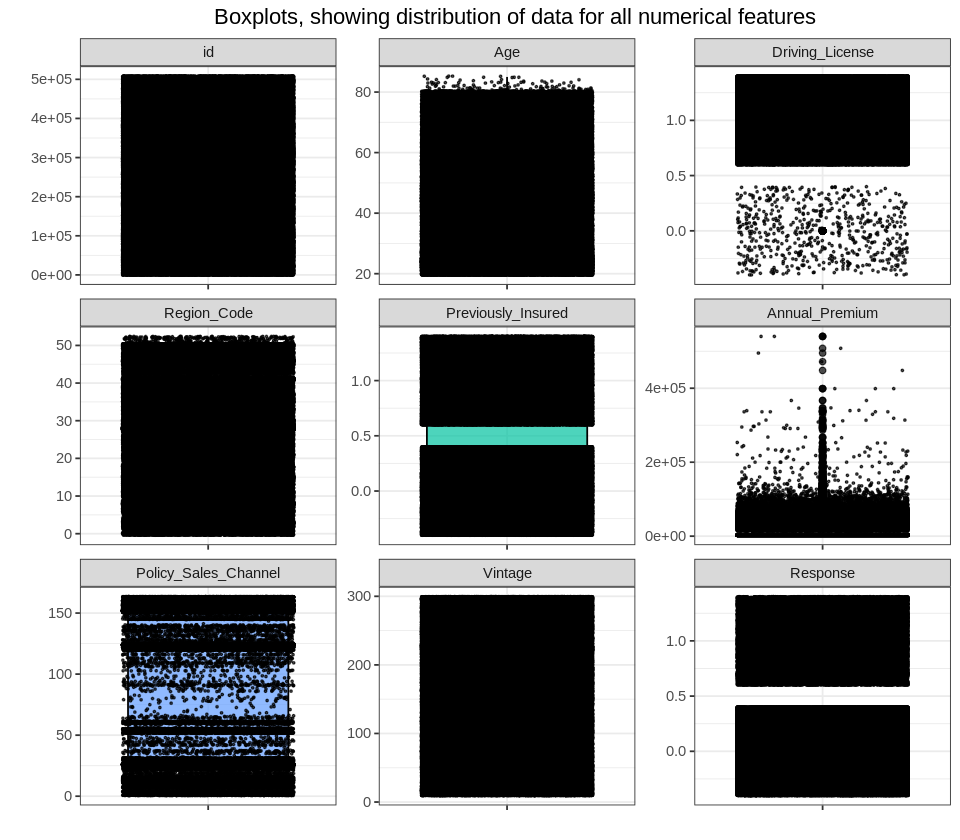

In [17]:
setup_fig_size(8, 7)

ggplot(train_data_melt, aes(x=Feature, y=value)) + 
geom_boxplot(alpha=0.7, color="black", aes(fill=Feature)) + 
geom_jitter(color="black", size=0.4, alpha=0.7) +
facet_wrap(~Feature, nrow=3, scales = "free") + 
labs(x="", y="", fill='Feature') + 
ggtitle("Boxplots, showing distribution of data for all numerical features") + 
theme_bw() + 
theme(legend.position="none", plot.title = element_text(hjust = 0.5), axis.text.x=element_blank())

**Observations:**

* Only attributes `smw` and `no_of_workers` show no outliers in the boxplots.
* Maximum value for `targeted_productivity` is 0.8 and they appear to be at certain values at 0.05 intervals. `actual_productivity`, however, is distributed continuously between 0.2 and values higher than 1 (highest value is 1.1204).
* Values for `incentive`, `idle_time`, and `idle_men` are mainly 0 or close to 0.
* `no_of_style_change` values are 0, 1, and 2. Most of the values are 0.

### Histograms

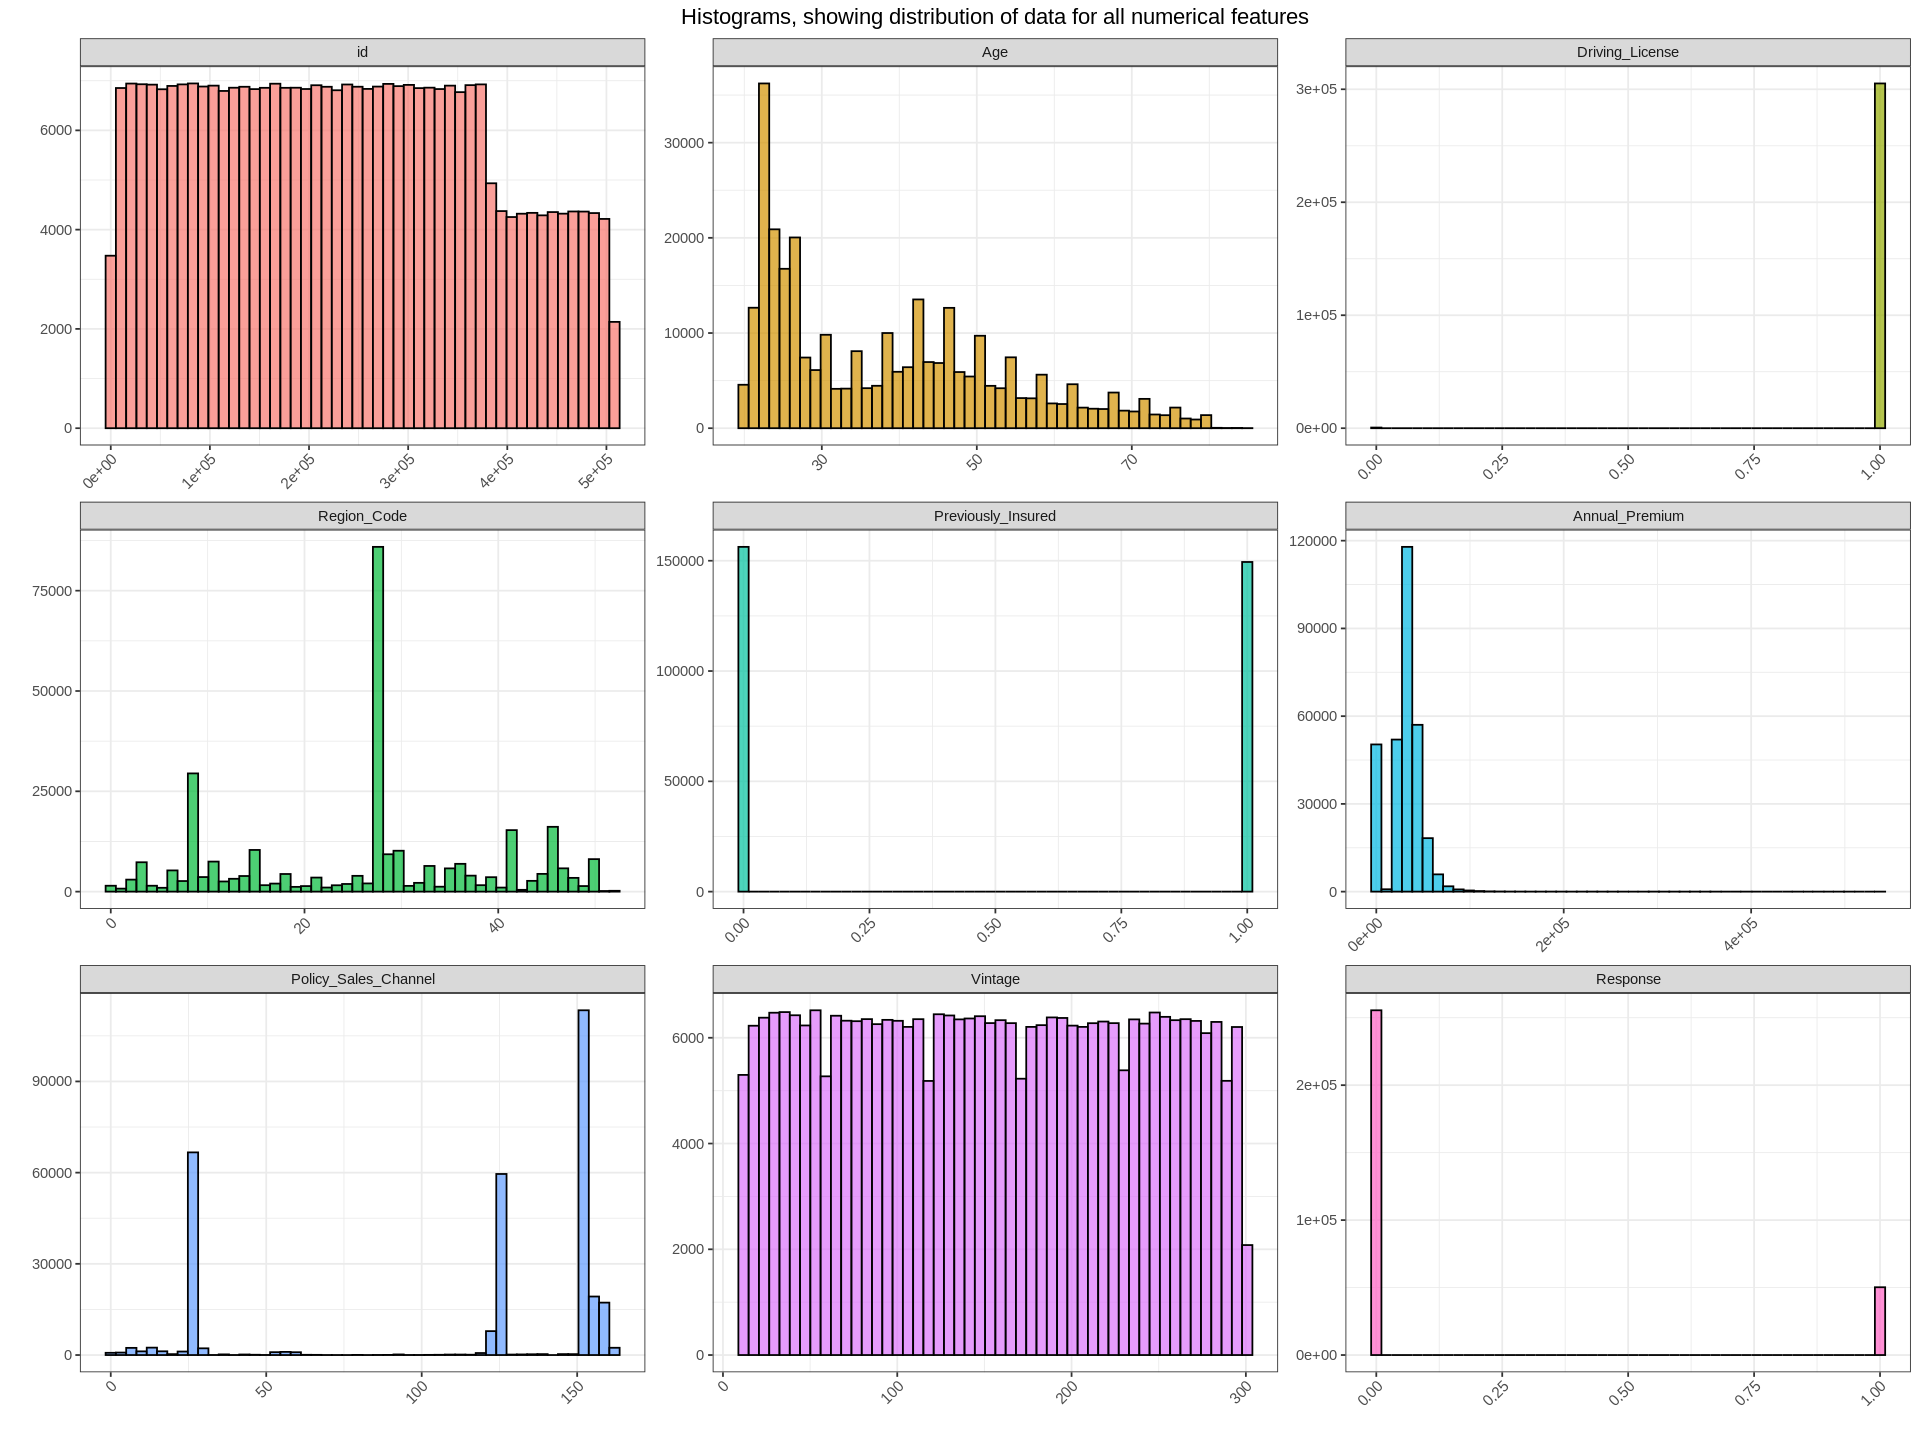

In [18]:
setup_fig_size(16, 12)

ggplot(train_data_melt, aes(value)) + 
geom_histogram(bins=50, alpha=0.7, color="black", aes(fill=Feature)) + 
facet_wrap(~Feature, nrow=3, scales = "free") + 
labs(x="", y="", fill='Feature') + 
ggtitle("Histograms, showing distribution of data for all numerical features") + 
theme_bw() + 
theme(legend.position="none", plot.title = element_text(hjust = 0.5), 
      axis.text.x = element_text(angle = 45, hjust = 1))

**Observations:** 

* Almost no variable shows an acceptable normal distribution. They seem to be highly skewed.
* `targeted_productivity` distribution is left skewed, while `smw` distribution is right skewed.
* `wip`, `incentive`, `idle_time`, and `idle_men` show only a major peak at 0. This is caused by outliers at very larger values.
* `over_time` and `number_of_workers` show almost three peaks.
* `actual_productivty` distribution shows some lef-skewness, although the distribution looks relatively more normal compared to other variables.

### Correlations

In [22]:
train_data_copy <- train_data

In [23]:
train_data_copy$Gender <- ifelse(train_data_copy$Gender == "Female",0,1)
train_data_copy$Vehicle_Age <- ifelse(train_data_copy$Vehicle_Age == "< 1 Year",0,
                                 ifelse(train_data_copy$Vehicle_Age == "1-2 Year",1,2))
train_data_copy$Vehicle_Damage <- ifelse(train_data_copy$Vehicle_Damage == "No",0,1)

In [24]:
head(train_data_copy)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,371101,0,23,1,28,1,0,0,47628,153,24,0
2,293944,0,66,1,28,0,1,1,68981,122,69,1
3,215236,1,24,1,36,1,0,0,37622,160,72,0
4,282668,0,46,1,31,0,1,1,2630,124,27,0
5,389325,0,39,1,28,0,1,1,74627,26,194,1
6,147057,1,46,1,29,1,1,0,2630,124,285,0


In [45]:
cor_mat <- round(cor(train_data_copy),2)

In [46]:
melted_cor_mat <- melt(cor_mat)
head(melted_cor_mat)

Warning message in type.convert.default(X[[i]], ...):
“'as.is' should be specified by the caller; using TRUE”
Warning message in type.convert.default(X[[i]], ...):
“'as.is' should be specified by the caller; using TRUE”


,X1,X2,value
,<fct>,<fct>,<dbl>
1,id,id,1.00
2,Gender,id,-0.01
3,Age,id,-0.03
4,Driving_License,id,0.01
5,Region_Code,id,0.00
6,Previously_Insured,id,0.10


In [37]:
reorder_cormat <- function(cor_mat){
    # Use correlation between variables as distance
    dd <- as.dist((1-cor_mat)/2)
    hc <- hclust(dd)
    cor_mat <- cor_mat[hc$order, hc$order]
}

In [38]:
 # Get upper triangle of the correlation matrix
get_upper_tri <- function(cor_mat){
    cor_mat[lower.tri(cor_mat)]<- NA
    return(cor_mat)
}

In [47]:
ggheatmap <- ggplot(melted_cor_mat, aes(X2, X1, fill = value))+
 geom_tile(color = "white") +
 scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
   midpoint = 0, limit = c(-1,1), space = "Lab", 
    name="Pearson\nCorrelation") +
  theme_minimal()+ # minimal theme
 theme(axis.text.x = element_text(angle = 45, vjust = 1, 
    size = 12, hjust = 1)) + coord_fixed()

#### Heatmap example 1

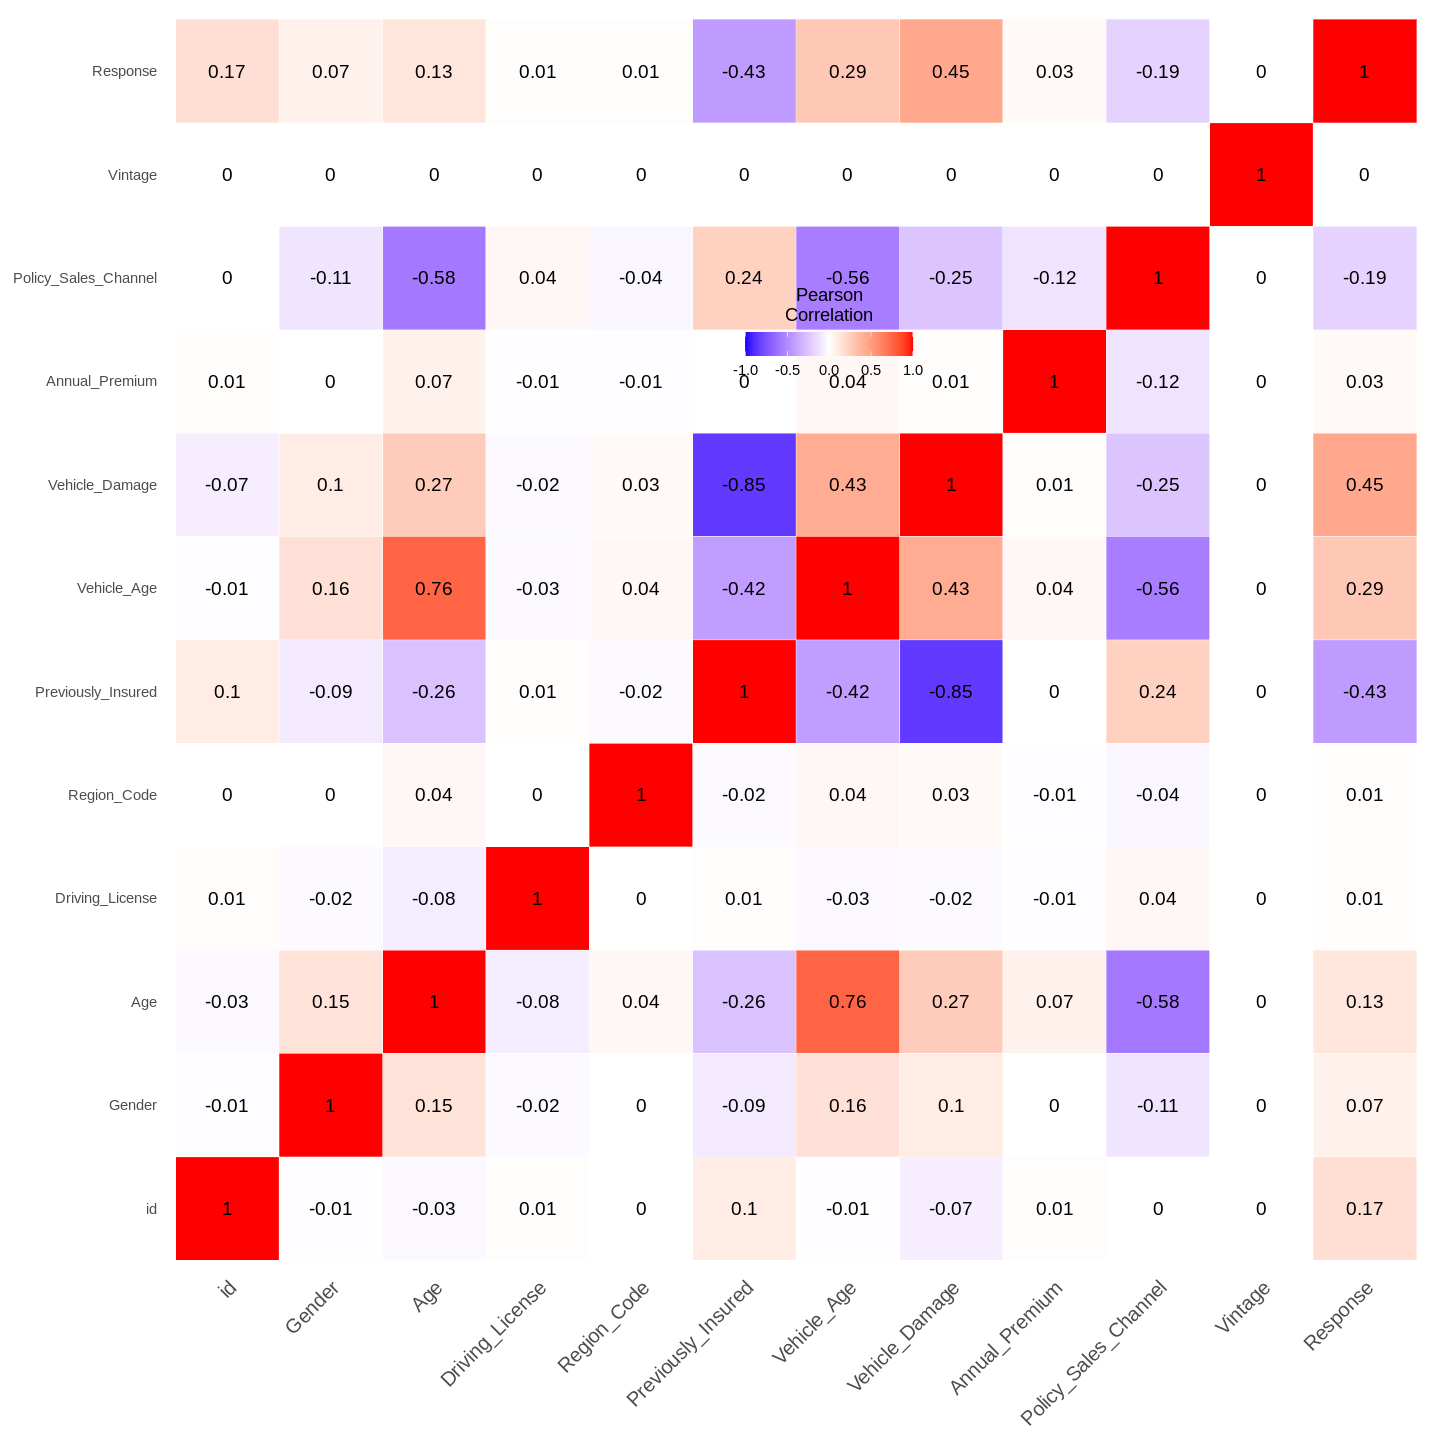

In [62]:
setup_fig_size(12, 12)

ggheatmap + 
geom_text(aes(X2, X1, label = value), color = "black", size = 4) +
theme(
  axis.title.x = element_blank(),
  axis.title.y = element_blank(),
  panel.grid.major = element_blank(),
  panel.border = element_blank(),
  panel.background = element_blank(),
  axis.ticks = element_blank(),
  legend.justification = c(1, 0),
  legend.position = c(0.6, 0.7),
  legend.direction = "horizontal")+
  guides(fill = guide_colorbar(barwidth = 7, barheight = 1,
                title.position = "top", title.hjust = 0.5))

#### Heatmap example 2

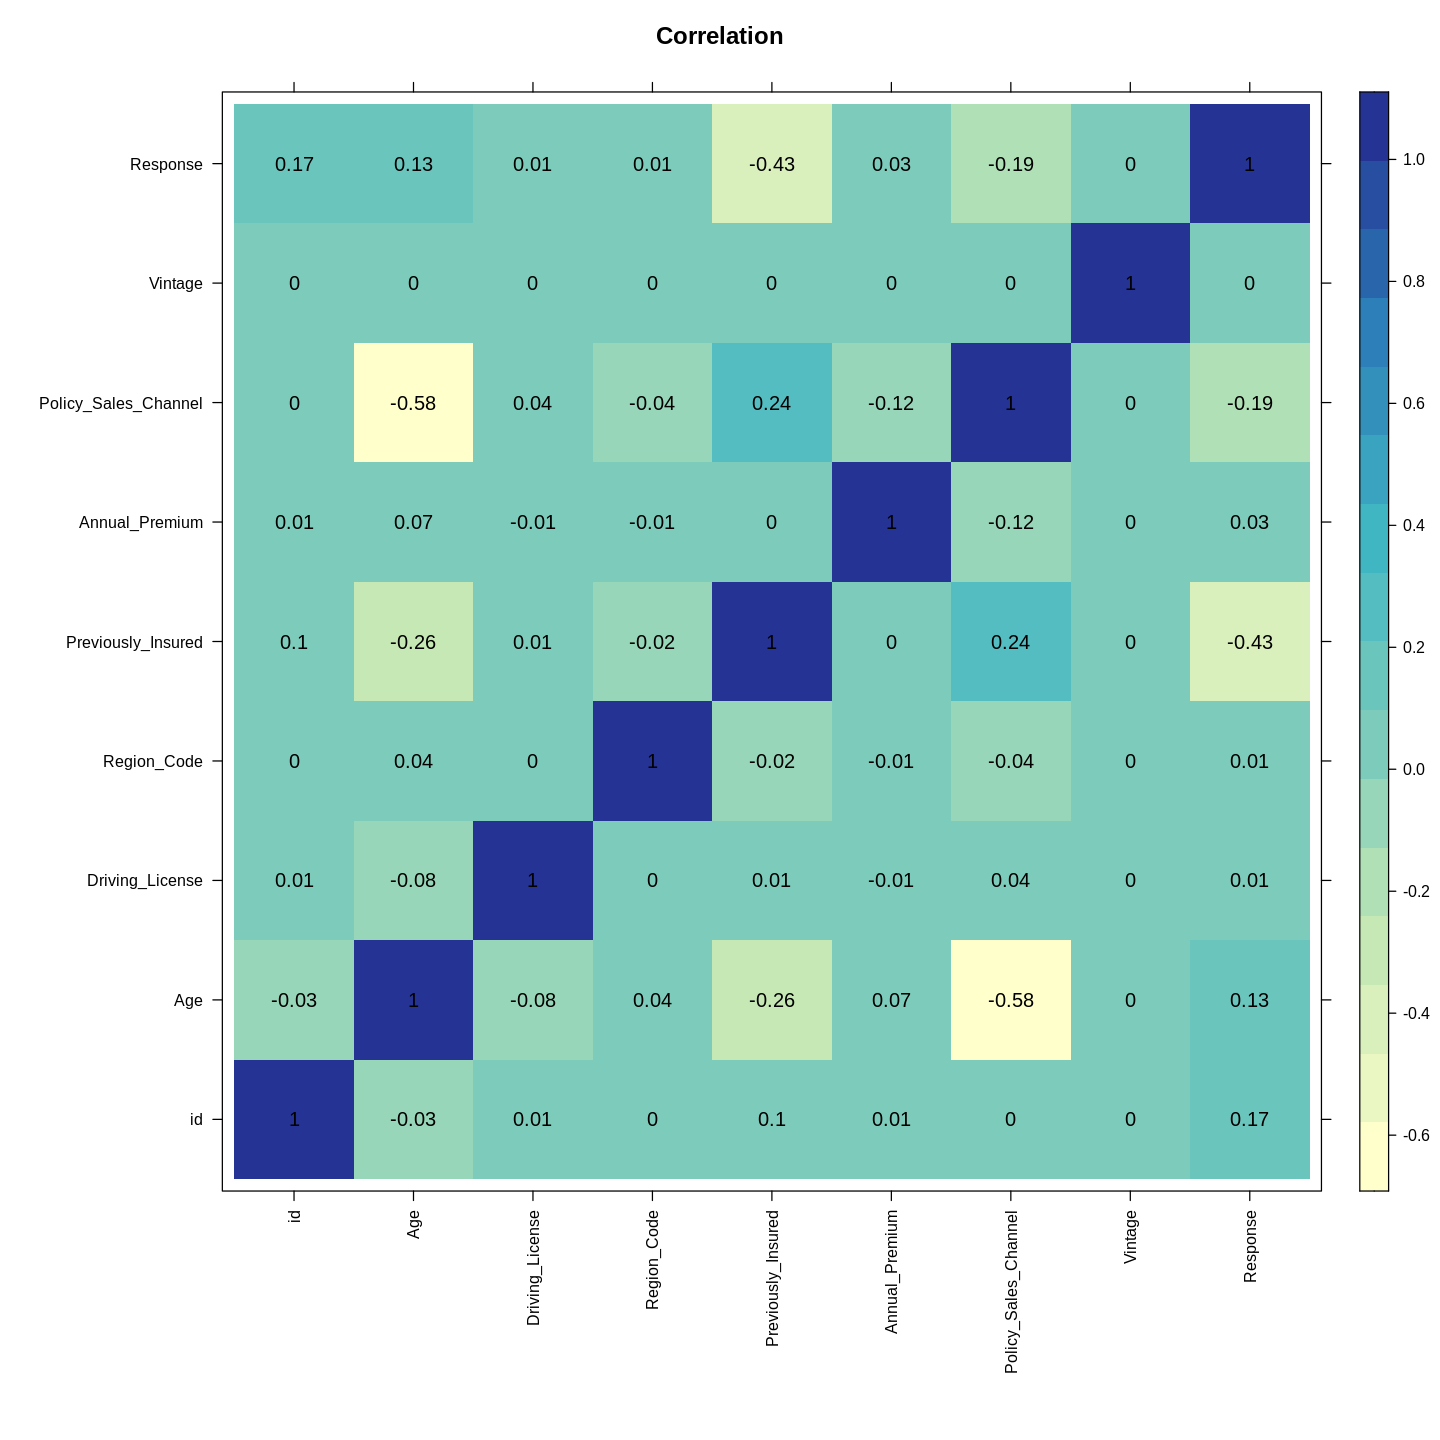

In [61]:
setup_fig_size(12, 12)

#Define you own panel
customise_panel <- function(x, y, z, ...) {
    panel.levelplot(x,y,z,...)
    panel.text(x, y, round(z, 2))
}

#Define the color scheme
colours<-c("#FFFFCC","#C7E9B4","#7FCDBB","#40B6C4","#2C7FB8" ,"#253494")
cols = colorRampPalette(colours)

#Plot the correlation matrix.
levelplot(cor(train_data_copy[num_cols]), col.regions = cols(100), main = "Correlation", xlab = NULL, ylab = NULL, 
          scales = list(x = list(rot = 90)), panel = customise_panel)

**Observations:** 

### EDA Symmary

## 1.3 Describe and justify the choice of your models according to your EDA.

## 1.4 Prediction Models

### 1.4.1 Data Preprocessing

#### a. Convert Characters to Numeric

In [10]:
train_data$Gender <- ifelse(train_data$Gender == "Female",0,1)
train_data$Vehicle_Age <- ifelse(train_data$Vehicle_Age == "< 1 Year",0,
                                 ifelse(train_data$Vehicle_Age == "1-2 Year",1,2))
train_data$Vehicle_Damage <- ifelse(train_data$Vehicle_Damage == "No",0,1)

In [11]:
str(train_data)

'data.frame':	305723 obs. of  12 variables:
 $ id                  : int  371101 293944 215236 282668 389325 147057 105585 184855 81246 167214 ...
 $ Gender              : num  0 0 1 0 0 1 0 0 0 0 ...
 $ Age                 : int  23 66 24 46 39 46 22 23 32 20 ...
 $ Driving_License     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Region_Code         : num  28 28 36 31 28 29 50 16 36 37 ...
 $ Previously_Insured  : int  1 0 1 0 0 1 1 1 1 0 ...
 $ Vehicle_Age         : num  0 1 0 1 1 1 0 0 0 0 ...
 $ Vehicle_Damage      : num  0 1 0 1 1 0 0 0 0 1 ...
 $ Annual_Premium      : num  47628 68981 37622 2630 74627 ...
 $ Policy_Sales_Channel: num  153 122 160 124 26 124 152 152 152 160 ...
 $ Vintage             : int  24 69 72 27 194 285 91 192 38 137 ...
 $ Response            : int  0 1 0 0 1 0 0 0 0 0 ...


### 1.4.2 Model Selection

### 1.4.3 Model Building

## 1.5 Evaluation

# 2. Explanation Task Sample Solution

## 2.1 Model Inference

## 2.2 Suggestions